In [1]:
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a dark background
sns.set_style("whitegrid")

In [2]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix




In [8]:
# Read in your csv file that has the mid features. 


data_train = pd.read_csv('../Feature Extraction/midFeaturesTrainSetWithChars.csv')

data_test = pd.read_csv('../Feature Extraction/midFeaturesTestSetWithChars.csv')





In [11]:
data_train.head()

,FileID,actorID,Emotion,SentenceID,Age,Sex,Race,Ethnicity,zcr_mean,energy_mean,...,delta chroma_4_std,delta chroma_5_std,delta chroma_6_std,delta chroma_7_std,delta chroma_8_std,delta chroma_9_std,delta chroma_10_std,delta chroma_11_std,delta chroma_12_std,delta chroma_std_std
0,1091_MTI_HAP_XX,1091,HAP,MTI,29,Female,Asian,Not Hispanic,0.103094,0.010426,...,0.017033,0.016811,0.018297,0.020554,0.005190,0.008010,0.014288,0.018384,0.003024,0.009549
1,1033_TIE_NEU_XX,1033,NEU,TIE,31,Male,Caucasian,Not Hispanic,0.095550,0.006244,...,0.026957,0.022260,0.016414,0.016756,0.006733,0.004914,0.014508,0.019974,0.003226,0.008867
2,1016_ITH_ANG_XX,1016,ANG,ITH,61,Male,Caucasian,Not Hispanic,0.084617,0.012109,...,0.018824,0.015078,0.014390,0.017400,0.006796,0.004869,0.017074,0.028463,0.006532,0.008469
3,1082_DFA_NEU_XX,1082,NEU,DFA,20,Female,Caucasian,Not Hispanic,0.085034,0.006593,...,0.018890,0.013363,0.014448,0.019450,0.006658,0.007513,0.021923,0.021861,0.006262,0.008800
4,1074_ITH_FEA_XX,1074,FEA,ITH,31,Female,African American,Not Hispanic,0.080987,0.009392,...,0.032367,0.019901,0.016781,0.019547,0.005369,0.006296,0.014283,0.020008,0.004862,0.008996


In [9]:
# Check the percentages of the different emotion categories in the training set



data_train.Emotion.value_counts(normalize=True)

NEU    0.178798
HAP    0.164240
ANG    0.164240
FEA    0.164240
DIS    0.164240
SAD    0.164240
Name: Emotion, dtype: float64

In [10]:
# Check the percentages of the different emotion categories in the test set


data_test.Emotion.value_counts(normalize=True)

NEU    0.179167
HAP    0.164167
SAD    0.164167
FEA    0.164167
ANG    0.164167
DIS    0.164167
Name: Emotion, dtype: float64

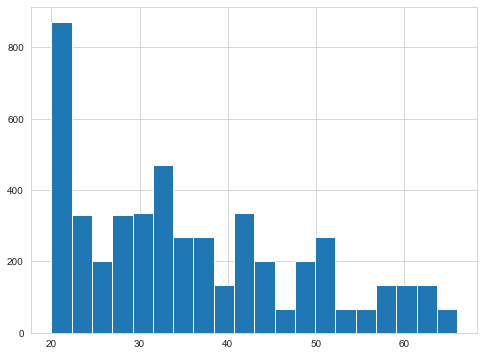

In [13]:
# Check the distribution of ages in the train set

plt.figure(figsize = (8, 6))

plt.hist(data_train.Age, bins = 20)

plt.show()



In [7]:
# Split the train and test set into labels (y) and features (X)

y_train = data_train[['Emotion']]
y_test = data_test[['Emotion']]

X_train = data_train.drop(columns = ['FileID', 'actorID', 'Emotion', 'SentenceID' ])
X_test = data_test.drop(columns = ['FileID', 'actorID', 'Emotion', 'SentenceID' ])






In [8]:
# Add a column to the y vectors encoding each of the emotions.


y_train_dummies = pd.get_dummies(y_train)

y_train = pd.concat([y_train, y_train_dummies], axis=1)

y_test_dummies = pd.get_dummies(y_test)

y_test = pd.concat([y_test, y_test_dummies], axis=1)



In [9]:
# Check that the encoding looks right

y_train.head()

,Emotion,Emotion_ANG,Emotion_DIS,Emotion_FEA,Emotion_HAP,Emotion_NEU,Emotion_SAD
3771,SAD,0,0,0,0,0,1
2809,DIS,0,1,0,0,0,0
7041,FEA,0,0,1,0,0,0
2129,NEU,0,0,0,0,1,0
3342,SAD,0,0,0,0,0,1


In [10]:
# Example: try to train a support vector machine with Gaussian radial kernel to distinguish between instances
# where emotion is 'ANG' and instances where emotion is 'HAP'. 



# Get the rows of X_train, X_test corresponding to just the emotions 'ANG' and 'HAP'

X_train_sub = X_train.loc[(y_train.Emotion == 'ANG') | (y_train.Emotion == 'HAP')]
X_test_sub = X_test.loc[(y_test.Emotion == 'ANG') | (y_test.Emotion == 'HAP')]


# Get the Emotion_ANG column of the ys, with only the rows corresponding to 'ANG' and 'HAP'

y_train_sub = y_train.loc[(y_train.Emotion == 'ANG') | (y_train.Emotion == 'HAP')].Emotion_ANG
y_test_sub = y_test.loc[(y_test.Emotion == 'ANG') | (y_test.Emotion == 'HAP')].Emotion_ANG


# Build pipeline to first scale the mid feature data, then apply the SVC

pipe = Pipeline([('scale', StandardScaler()),
                 ('svc', SVC(kernel='rbf'))])


# Fit the model to the training data

pipe.fit(X_train_sub, y_train_sub)

    
# Get the model's prediction on the test data

pred = pipe.predict(X_test_sub)



In [11]:
# Look at the confusion matrix for the test data :
confusion_matrix(y_test_sub, pred)


array([[126, 128],
       [129, 126]])

In [12]:
# Look at the confusion matrix for the training data:
pred_train = pipe.predict(X_train_sub)

confusion_matrix(y_train_sub, pred_train)

array([[859, 158],
       [188, 828]])